# Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
# package permettant de normaliser les variables (voir à la fin)
from sklearn.preprocessing import MinMaxScaler
# package permettant d'entraîner nos valeurs
from sklearn.model_selection import train_test_split
import warnings; warnings.simplefilter('ignore')

# 1 - Prise en main d'un problème, mise en route du projet

## 1.1 - Choix d'un problème (dataset) 

Pour ce projet d'IAS nous avons décidé de partir sur une prédiction du prix des habitations. Après avoir parcouru plusieurs dataset sur Kaggle nous avons sélectionné celui sur la ville de Melbourne.

[lien vers notre dataset](https://www.kaggle.com/datasets/wulphtv/melb-datacsv).

In [2]:
#Importation du dataset dans une variable
data = pd.read_csv('melb_data.csv')

## 1.2 - Exploration préliminaire des données

### Voici quelques données du dataset

In [3]:
#5 premières lignes du dataset pour avoir une petite vue de nos données
data.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
5360,Richmond,305/45 York St,1,u,402000.0,S,hockingstuart,17/09/2016,2.6,3121.0,...,1.0,1.0,0.0,NaN,NaN,Yarra,-37.8130,144.9930,Northern Metropolitan,14949.0
7541,Box Hill,22 Combarton St,5,h,1726000.0,S,Noel,20/05/2017,13.1,3128.0,...,2.0,2.0,631.0,NaN,NaN,Whitehorse,-37.8265,145.1276,Eastern Metropolitan,4605.0
820,Bentleigh East,1/6 Richard St,2,u,651000.0,S,Gary,7/05/2016,13.9,3165.0,...,1.0,1.0,265.0,150.0,1960.0,Glen Eira,-37.9223,145.0747,Southern Metropolitan,10969.0
6228,Templestowe Lower,3 Astley St,4,h,920000.0,PI,Barry,22/08/2016,13.8,3107.0,...,2.0,2.0,678.0,NaN,1980.0,Manningham,-37.7613,145.1047,Eastern Metropolitan,5420.0
2943,Glenroy,165 Hilton St,4,h,630000.0,S,Stockdale,27/11/2016,13.0,3046.0,...,2.0,2.0,602.0,180.0,1950.0,Moreland,-37.7005,144.9258,Northern Metropolitan,8870.0


### Taille du dataset

In [4]:
#Nombre d'habitation et de features du dataset
data.shape

(13580, 21)

### Information sur les features

In [5]:
#Informations générales sur nos features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

### Descriptif de certaines features

- Rooms: Nombre de chambres

- Price: Prix en dollars

- Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

- Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

- SellerG: Agent immobilier

- Date: Date de vente

- Distance: Distance du quartier central des affaires

- Regionname: Region générale (West, North West, North, North east …etc)

- Propertycount: Nombre de propriétés qui existent dans la banlieue

- Bedroom2 : Scraped # of Bedrooms (from different source)

- Bathroom: Nombre de salles de bain

- Car: Nombre de place de parking

- Landsize: Taille du terrain

- BuildingArea: Taille du bâtiment

- CouncilArea: Conseil d'administration de la région

### Visualitaion des habitations de Melbourne en fonction de leur localisation et leur prix

<AxesSubplot:xlabel='Longtitude', ylabel='Lattitude'>

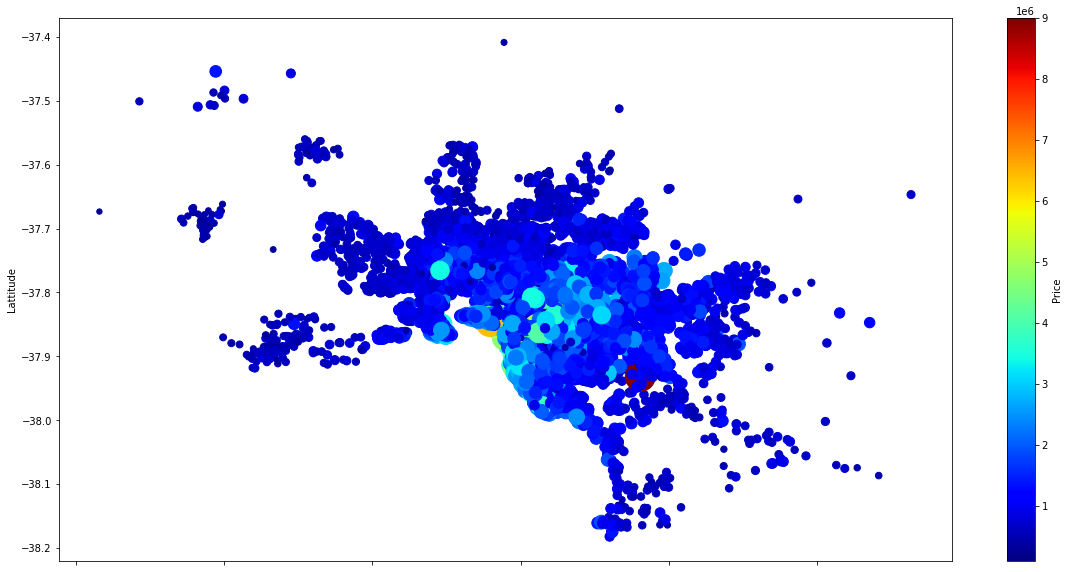

In [6]:
#On divise le prix de manière assez conséquente pour distinguer de manière plus lisible le prix selon la position de la ville
mappa = data.plot(kind='scatter', x='Longtitude',y='Lattitude',
             s=data['Price']/10000, figsize=(20,10),
             c='Price', cmap=plt.get_cmap('jet'), colorbar = True,)
mappa
# s les données matérialisés par plot ici c'est le prix qui nous sert de distinction
# c la légende de notre barre d'état

<div>
<img src="attachment:Screenshot.png" width="500"/>
</div>

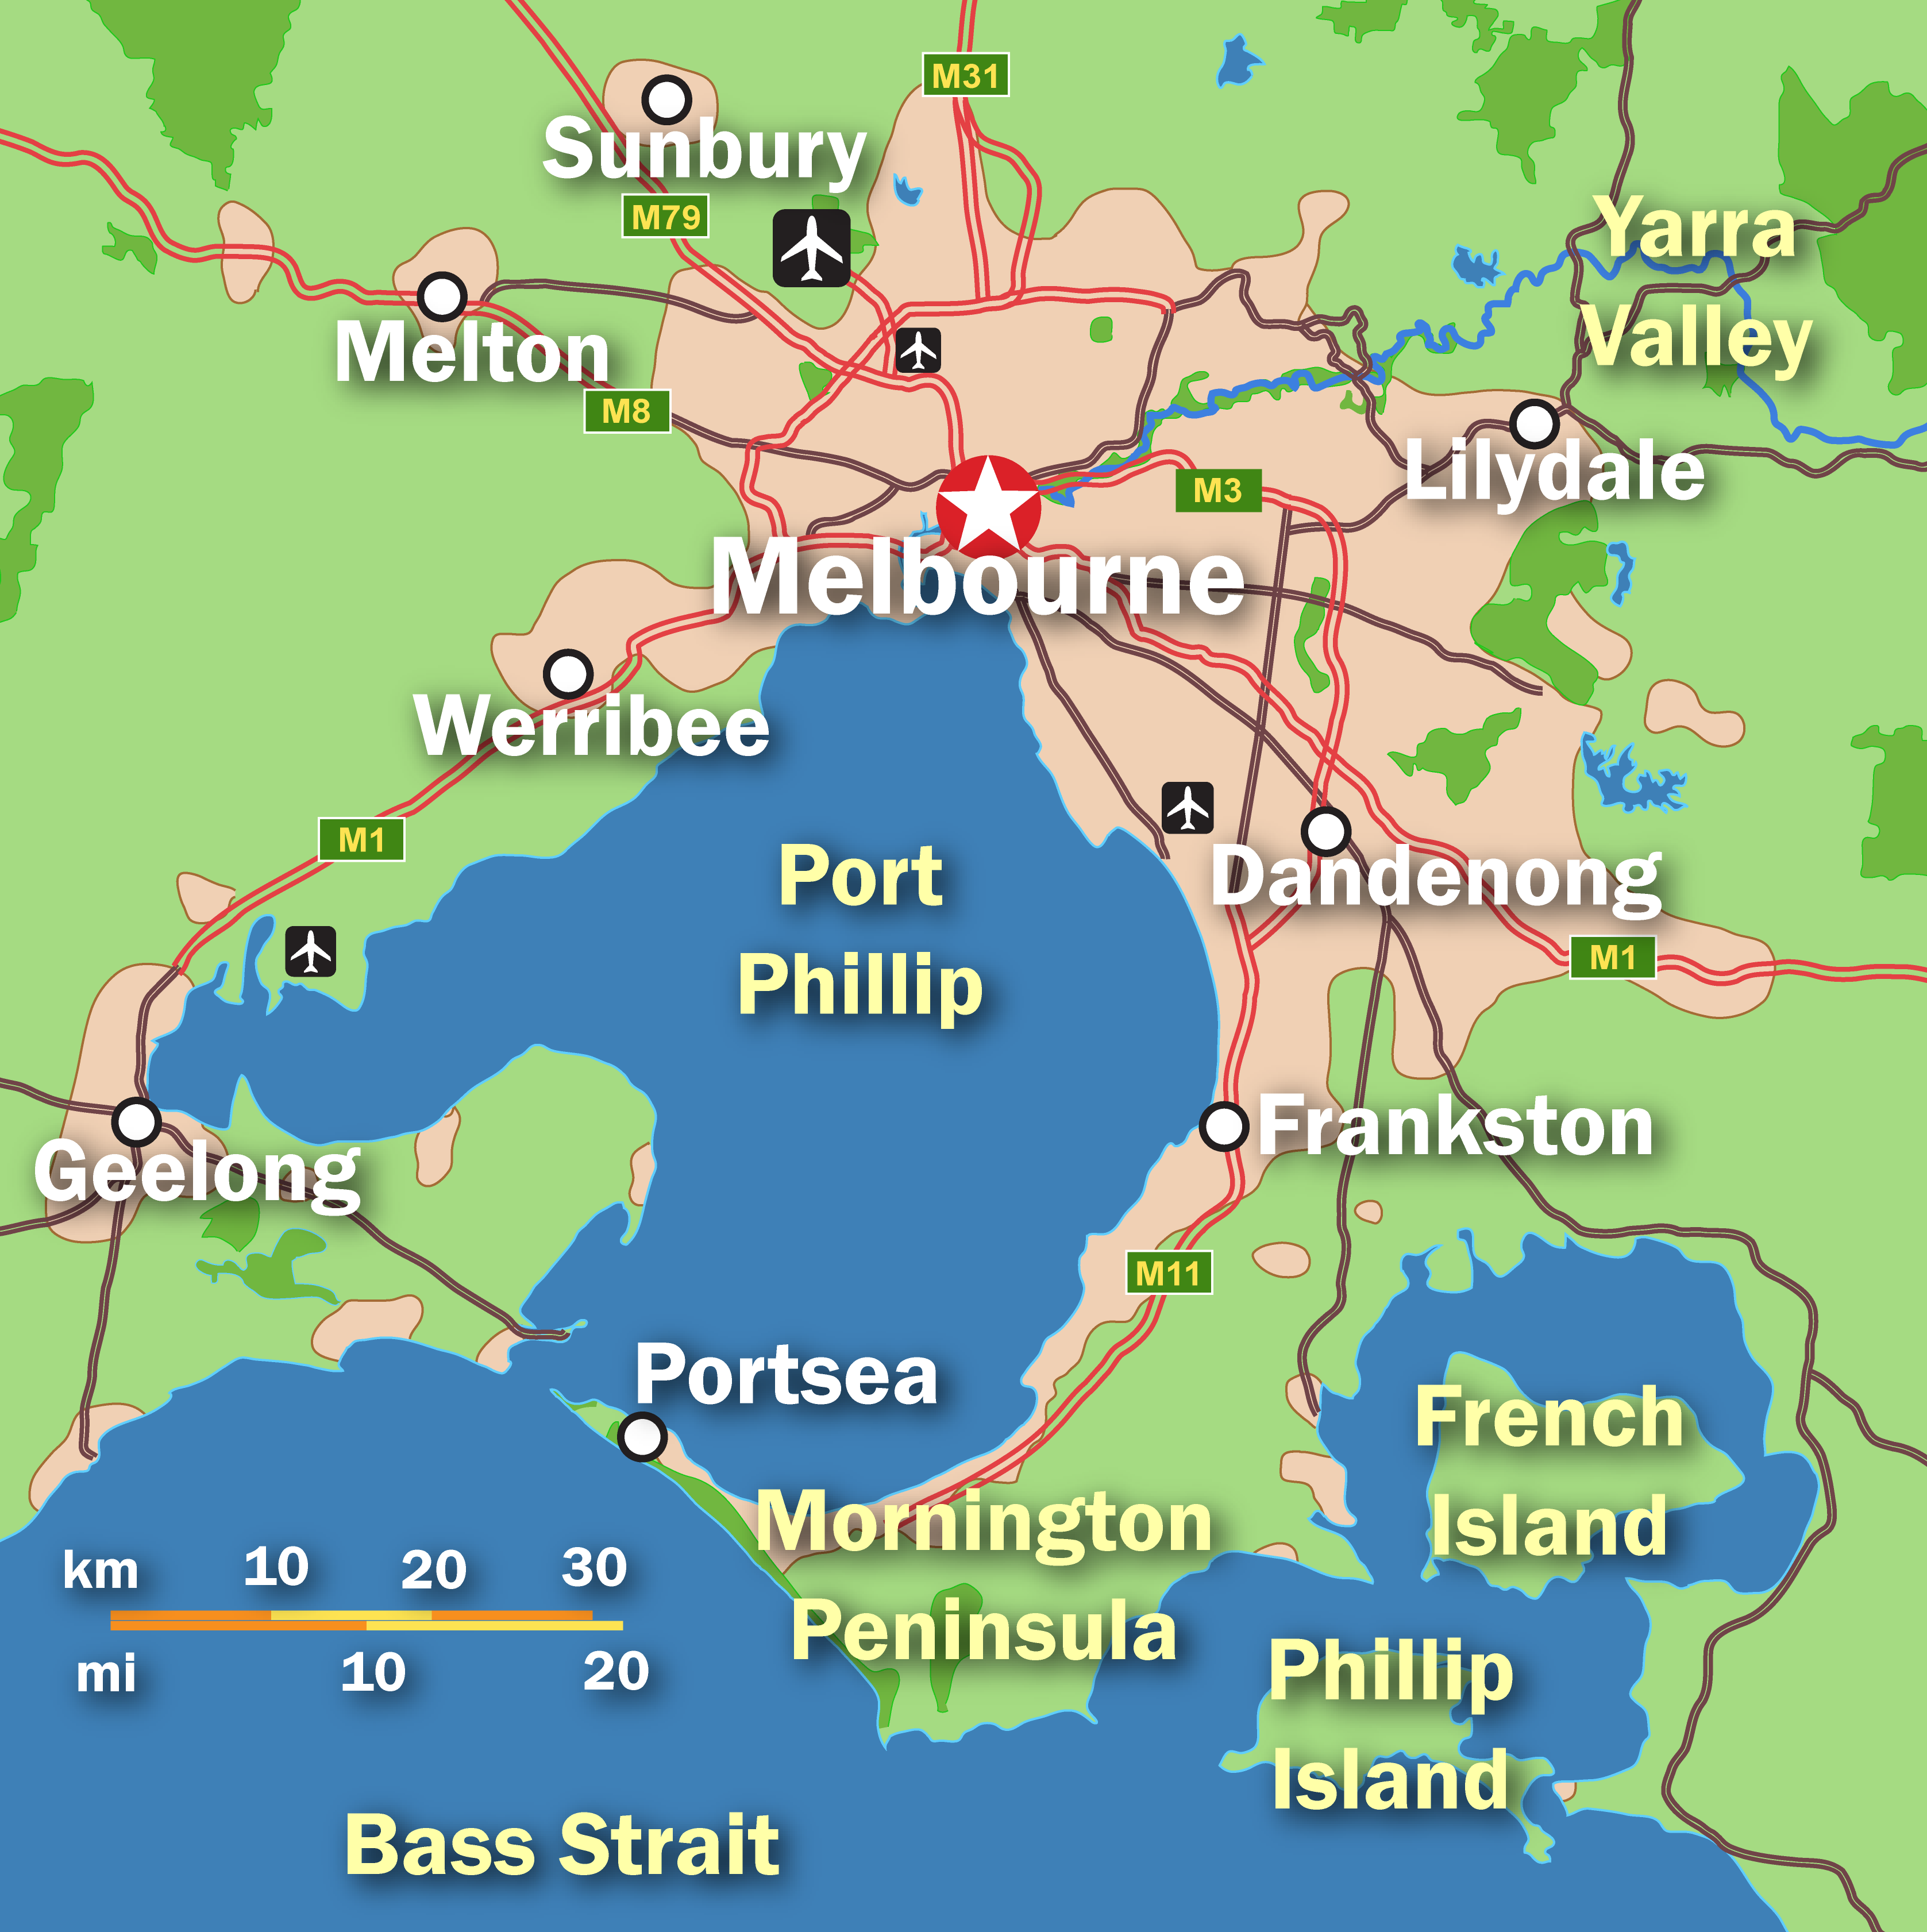

In [7]:
from PIL import Image
path = "Greater_Melbourne_Map_4_-_May_2008.png"
display(Image.open(path))

## 1.3 - Définition de la tâche et choix d'une métrique de performance

### Obejctif global

Le but de ce projet sera d'appliquer un modele sur le dataset afin de prédire le prix d'une habitation à Melbourne. 

### Type de tâche à accomplir

La tâche à accomplir pour satisfaire cet objectif sera une régression linéaire.

# 2 - Travail sur le fond

## 2.1 - Data Cleaning

### Vérifiaction et traitement des données manquantes

Dans cette parties nous allons vérifier s'il y a des données manquantes sur certaines features.

On remarque qu'il y a 4 features avec des données manquantes:
- Le nombre de place de parking (Car), 62 valeurs manquantes de type float
- La taille des bâtiments (BuildingArea), 6450 valeurs manquantes de type float
- L'année de construction (YearBuilt), 5375 valeurs manquantes de type float
- Le conseil d'administration de la région (CouncilArea), 1369 valeurs manquantes de type object

Pour éviter de fausser les calculs plus tard nous passons les valeurs manquantes de type float à la médiane et nous laissons la features du conseil d'admnistration tel quel pour l'instant car elle est de type object.

In [8]:
pd.DataFrame({'Données manquantes' : pd.isnull(data).sum()})

,Données manquantes
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


In [9]:
data["Car"].fillna(data["Car"].median(), inplace=True)
data["BuildingArea"].fillna(data["BuildingArea"].median(), inplace=True)
data["YearBuilt"].fillna(data["YearBuilt"].median(), inplace=True)

Vérification

In [10]:
pd.DataFrame({'Données manquantes' : pd.isnull(data).sum()})

,Données manquantes
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


### Vérification du type des features

Pendant l'exploration des données on pouvait remarquer qu'il y avait des features dont les données avaient un type float au lieu d'un int:
- L'adresse postale
- Bedroom2
- Le nombre de salles de bain
- Le nombre de place de parking
- L'année de construction
- Le nombre de propriétés qui existent dans la banlieue

In [11]:
print('Postcode type: ', data['Postcode'].dtype)
print('Bedroom2 type: ', data['Bedroom2'].dtype)
print('Bathroom type: ', data['Bathroom'].dtype)
print('Car type: ', data['Car'].dtype)
print('YearBuilt type: ', data['YearBuilt'].dtype)
print('Propertycount type: ', data['Propertycount'].dtype)

Postcode type:  float64
Bedroom2 type:  float64
Bathroom type:  float64
Car type:  float64
YearBuilt type:  float64
Propertycount type:  float64


On corrige cette erreur en remetant le bon type.

In [12]:
data['Postcode'] = data['Postcode'].astype(int)
data['Bedroom2'] = data['Bedroom2'].astype(int)
data['Bathroom'] = data['Bathroom'].astype(int)
data['Car'] = data['Car'].astype(int)
data['YearBuilt'] = data['YearBuilt'].astype(int)
data['Propertycount'] = data['Propertycount'].astype(int)

Vérification

In [13]:
print('Postcode type: ', data['Postcode'].dtype)
print('Bedroom2 type: ', data['Bedroom2'].dtype)
print('Bathroom type: ', data['Bathroom'].dtype)
print('Car type: ', data['Car'].dtype)
print('YearBuilt type: ', data['YearBuilt'].dtype)
print('Propertycount type: ', data['Propertycount'].dtype)

Postcode type:  int64
Bedroom2 type:  int64
Bathroom type:  int64
Car type:  int64
YearBuilt type:  int64
Propertycount type:  int64


### Corrélation de nos features

On verifie les corrélations entre features pour voir si elles sont assez correlées.

On y applique le principe de corrélation de Pearson : cette corrélation permet d'obtenir une valeur par l'estimation de la corrélation
entre deux variables du dataset. Elle fluctuera d'une comparaison à l'autre et nous indique si nos deux paramètres sont corrélés ou pas.

<AxesSubplot:>

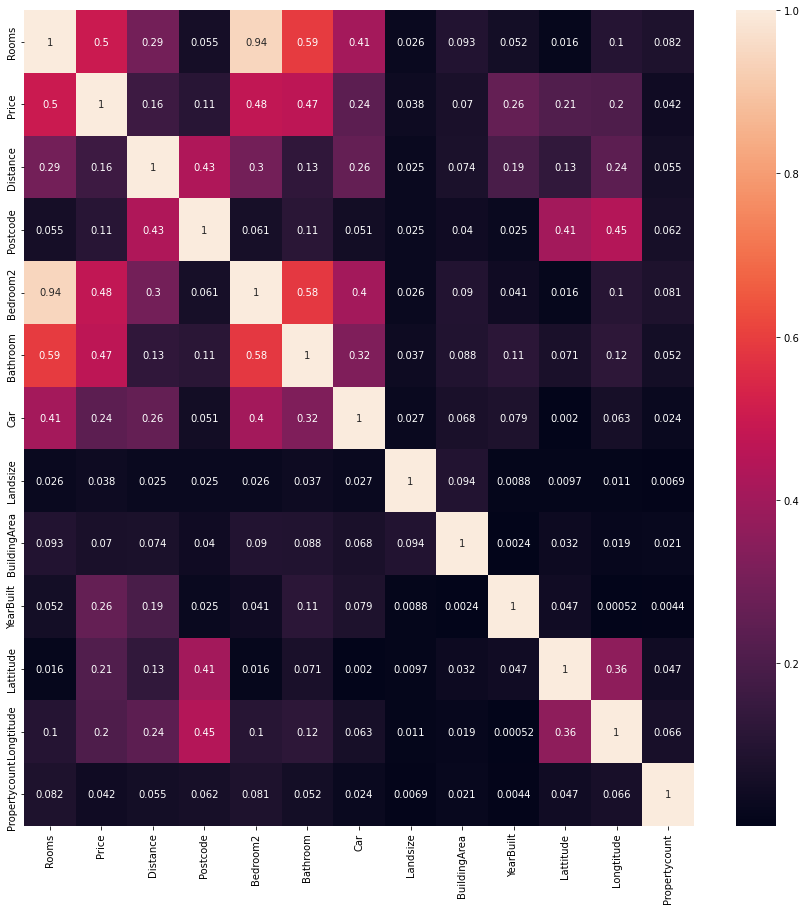

In [14]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr().abs(),  annot=True)

### Correlations des features avec le prix :
- Corrélation positive : La feature impacte le prix de manières à l'augmenter.
- Corrélation négative : La feature impacte le prix de manières à la diminuer.
- Corrélation proche de zéro : L'impact sur le prix est négligeable.

In [15]:
pd.DataFrame({'Corrélation en fonction du prix' : data.corr()['Price'].sort_values(ascending=False)})

,Corrélation en fonction du prix
Price,1.000000
Rooms,0.496634
Bedroom2,0.475951
Bathroom,0.467038
Car,0.239109
Longtitude,0.203656
Postcode,0.107867
BuildingArea,0.069763
Landsize,0.037507
Propertycount,-0.042153


On remarque ici que il y a des features avec une bonne corrélation avec le prix mais certaines sont presque pas corrélées et pourtant elles auraient été pertinentes pour la prédiction du prix.

## 2.2 - Train-test-validation split

- On stocke nos features avec des valeurs numériques dans un tableau X sans le prix car c'est notre feature cible.
- On stocke les prix dans un tableau Y.
- Les features non stocké dans un des deux tableaux sont des valeurs de type object qui ne sont pas nécessaire à l'estimation des prix des maisons tel que le nom de l'agence immobilière, l'adresse, etc. 

In [16]:
columns = ['Rooms','Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount']
X = data[columns]
Y = X['Price']
del X['Price']

- Ici on effectue notre split avec 20% pour les tests et 80% pour l'entrainement.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## 2.3 - Optimisations

### 2.3.1 - Architecture

### Decision Tree (arbre de décision) - Définition

L'apprentissage par arbre de décision est une méthode classique en apprentissage automatique 3. Son but est de créer un modèle qui prédit la valeur d'une variable-cible depuis la valeur de plusieurs variables d'entrée.

Une des variables d'entrée est sélectionnée à chaque nœud intérieur (ou interne, nœud qui n'est pas terminal) de l'arbre selon une méthode qui dépend de l'algorithme et qui sera discutée plus loin. Chaque arête vers un nœud-fils correspond à un ensemble de valeurs d'une variable d'entrée, de manière que l'ensemble des arêtes vers les nœuds-fils couvrent toutes les valeurs possibles de la variable d'entrée.

Chaque feuille (ou nœud terminal de l'arbre) représente soit une valeur de la variable-cible, soit une distribution de probabilité des diverses valeurs possibles de la variable-cible. La combinaison des valeurs des variables d'entrée est représentée par le chemin de la racine jusqu'à la feuille.

L'arbre est en général construit en séparant l'ensemble des données en sous-ensembles en fonction de la valeur d'une caractéristique d'entrée. Ce processus est répété sur chaque sous-ensemble obtenu de manière récursive, il s'agit donc d'un partitionnement récursif.

La récursion est achevée à un nœud soit lorsque tous les sous-ensembles ont la même valeur de la caractéristique-cible, ou lorsque la séparation n'améliore plus la prédiction.

On importe notre arbre de décision qu'on fit avec nos données d'entrainement.

In [18]:
from sklearn.tree import DecisionTreeRegressor

decisiontree = DecisionTreeRegressor()
decisiontree.fit(X_train, y_train)

DecisionTreeRegressor()

Ici on regarde le score de prédiction de notre modele avec les réglage par défaut pour les données d'entrainement et les données test. 

In [19]:
train_score = decisiontree.score(X_train,y_train)*100
test_score = decisiontree.score(X_test,y_test)*100

print("Score Entrainement: ", train_score, "%")
print("Score Test: ", test_score, "%")

Score Entrainement:  99.99374070756537 %
Score Test:  66.4357066041268 %


### 2.3.2 - Choix d'hyper-paramètres

On remarque que le score d'entrainement est de quasiment 100% ce qui est normal car le modele fait une prediction sur les données qu'on a fit donc ceux dont il a apprit les valeurs.

Pour le score de test on remarque qu'il est d'environ 66% ce qui est faible donc nous allons essayer de trouver les bons paramètres pour augmenter ce score et rendre le modèle plus performant sur l'estimation des prix des habitations.

Pour ce faire nous avons dans cette cellule de code décidé calculer le score en optimisant 2 paramètres:
- La profondeur maximale de notre arbre de décision
- Le minimum d'échantillons

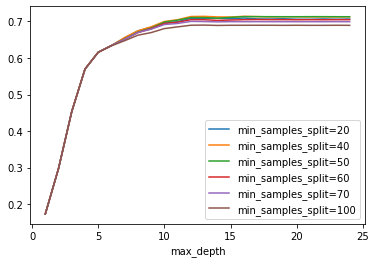

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
# On va choisir un minimum d'échantillons afin de déterminer à quel moment on est au max
min_samples_splits = [20, 40, 50, 60, 70, 100]
rows = []
#Pour la profondeur maximale
for max_depth in range(1, 25):
    #On crée un dictionnaire qui représente la taille de notre profondeur maximale
    #Si on overfit on ne conserve pas ses données
    d = dict(max_depth=max_depth)
    #Pour chacun de nos éléments dans notre min_samples_splits
    for min_samples_split in min_samples_splits:
        #En limitant notre arbre de regression, on évite l'overfitting
        decisiontree2 = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split)
        decisiontree2.fit(X_train, y_train)
        pred = decisiontree2.predict(X_test)
        score = r2_score(y_test, pred)
        d["min_samples_split=%d" % min_samples_split] = score
    rows.append(d)
pd.DataFrame(rows).plot(x="max_depth", y=["min_samples_split=%d" % _ for _ in min_samples_splits]);

In [21]:
d

{'max_depth': 24,
 'min_samples_split=20': 0.7066967107038457,
 'min_samples_split=40': 0.7126882473128596,
 'min_samples_split=50': 0.7130640211835186,
 'min_samples_split=60': 0.704997013076706,
 'min_samples_split=70': 0.6994259943949792,
 'min_samples_split=100': 0.6895067150699405}

Après notre optimisation on remarque qu'après une profondeur maximale d'environ 12 notre modele n'est pas plus performant et son score stagne de plus le meilleur score qu'ona en fonction de notre nombre minimum d'échantillons est d'environ 40-50 donc on refait notre prédiction avec ces nouveaux réglages et on regarde le nouveau score.

In [22]:
decisiontree3 = DecisionTreeRegressor(max_depth=12, min_samples_split=50)
decisiontree3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=12, min_samples_split=50)

In [23]:
# Méthode qui fit le mieux à nos données
print('Score Entrainement :', (decisiontree3.score(X_train, y_train))*100)
print('Score Test :', (decisiontree3.score(X_test, y_test))*100)

Score Entrainement : 81.24348046639234
Score Test : 71.07488099258101


### 2.3.3 - Résultats

In [24]:
train_score = decisiontree.score(X_train,y_train)*100
test_score = decisiontree.score(X_test,y_test)*100

print("Score Entrainement avant réglages: ", train_score, "%")
print('Score Entrainement après réglages:', (decisiontree3.score(X_train, y_train))*100)

print("Score Test avant réglages: ", test_score, "%")
print('Score Test après réglages:', (decisiontree3.score(X_test, y_test))*100)

Score Entrainement avant réglages:  99.99374070756537 %
Score Entrainement après réglages: 81.24348046639234
Score Test avant réglages:  66.4357066041268 %
Score Test après réglages: 71.07488099258101


# Conclusion et remarques

On peut remarquer que notre arbre de décision après réglage est plus performant mais on est conscient que cela reste faible et que on pourrait encore l'optimiser.

On pense aussi que ce score n'est pas seulement dû à notre optimisation mais à l'incohérance de certaines données de notre dataset.
Par exemple comme dit plus haut la taille des habitations devraient être parmis les features qui influencent le plus le prix de nos habitations or 
dans notre heatmap qui montre la corrélation entre nos features on voit que la taille des habitations n'est pas du tout correlé avec le prix ce qui montre les défauts de notre dataset. Nous avons essayer d'éxaminer certains codes avec du decisiontree sur kaggle lié à notre dataset et avons remarqué que les autres personnes obtenaient plus ou moins le même score que nous.

Erreur que nous avons fait sur ce projet :
L'année dernière nous avons effectué une regression aussi sur l'estimation des moyennes des élèves or notre dataset était beaucoup plus cohérant et nos scores étaient excellant nous avions bien compris le fonctionnement de l'algo et eu une assez bonne notes (14.5). Pour le projet de cette années nous avions pas le droit de reprendre le même pour l'améliorer donc nous avons changé pour ce dataset or nous avions pas fait attention à la qualité du dataset car on s'est précipité un peu en se disant qu'on savait déjà ce qu'il fallait faire.